# Лабораторная работа №3

<b>ФИО:</b> Табуринский Яков Андреевич  
<b>Группа:</b> БИВТ-21-4

Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Импорт данных

In [55]:
data = pd.read_csv('https://github.com/TaburinskyYakov1/Taburinsky_Yakov_BIVT-21-4/raw/main/insurance.csv')

# 2. Определение типа задачи

In [56]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


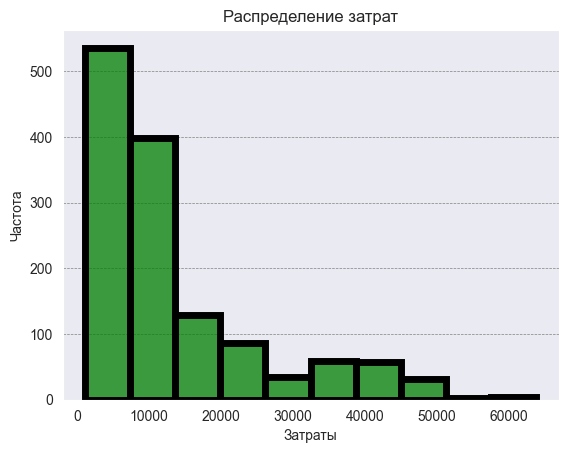

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установка зеленого цвета
color = 'green'

# Настройка общего стиля графика
sns.set_style("dark")

# Построение гистограммы с указанием цвета и другими параметрами
sns.histplot(data=data, x='charges', bins=10, color=color, edgecolor='black', linewidth=5)
plt.title("Распределение затрат")
plt.xlabel("Затраты")
plt.ylabel("Частота")
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.5)
plt.show()

Для задачи регрессии, нам необходимо спрогнозировать цену страховки на основе предоставленных данных. В итоге мы получим прогнозируемое вещественное число - стоимость страховки.

# 3. Предобработка данных

## Логарифмирование

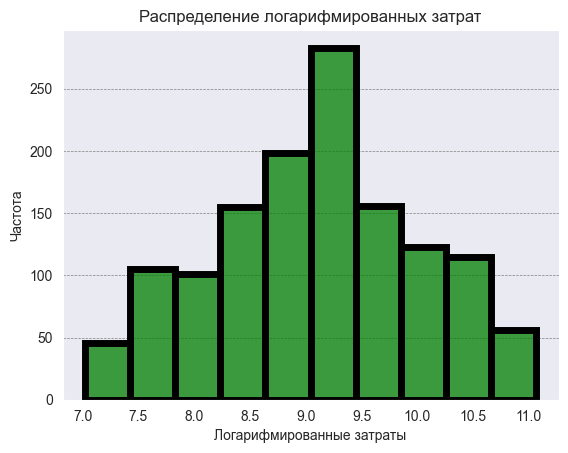

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Логарифмирование значений 'charges'
data['charges'] = np.log(data['charges'])

# Установка зеленого цвета
color = 'green'

# Настройка общего стиля графика
sns.set_style("dark")

# Построение гистограммы с указанием цвета и другими параметрами
sns.histplot(data=data, x='charges', bins=10, color=color, edgecolor='black', linewidth=5)
plt.title("Распределение логарифмированных затрат")
plt.xlabel("Логарифмированные затраты")
plt.ylabel("Частота")
plt.grid(True, axis='y', linestyle='--', color='gray', linewidth=0.5)
plt.show()

In [59]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268661
1334,18,female,31.920,0,no,northeast,7.698927
1335,18,female,36.850,0,no,southeast,7.396233
1336,21,female,25.800,0,no,southwest,7.604867


## Проверка и ликвидация (если есть) пропусков

In [60]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропусков нет

## Кодирование категориальных признаков

In [61]:
from sklearn.preprocessing import LabelEncoder

data['sex'] = LabelEncoder().fit_transform(data['sex'])
data['smoker'] = LabelEncoder().fit_transform(data['smoker'])
data['region'] = LabelEncoder().fit_transform(data['region'])

## Разделение выборки на тренировочную и тестовую

In [62]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [64]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 6)
X_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


In [65]:
X_train

,age,sex,bmi,children,smoker,region
1101,53,1,28.600,3,0,3
1256,51,0,36.385,3,0,1
1117,25,1,33.330,2,1,2
521,32,0,44.220,0,0,2
59,34,0,37.335,2,0,1
...,...,...,...,...,...,...
786,60,1,36.955,0,0,0
947,37,1,34.200,1,1,0
542,63,0,36.300,0,0,2
1267,24,1,31.065,0,1,0


## Нормирование численных переменных

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Обучение на тренировочном множестве

## Линейная модель

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [68]:
df_coef = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coef'])
df_coef.T

,age,sex,bmi,children,smoker,region
Coef,1.579419,-0.071972,0.444248,0.527184,1.538864,-0.133184


In [69]:
lr_r2_score = lin_reg.score(X_test, y_test)
lr_r2_score

0.7622902392650388

In [70]:
y_pred = lin_reg.predict(X_test)

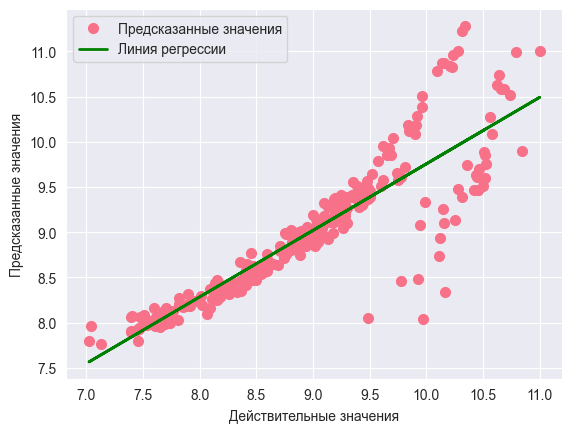

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='green', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

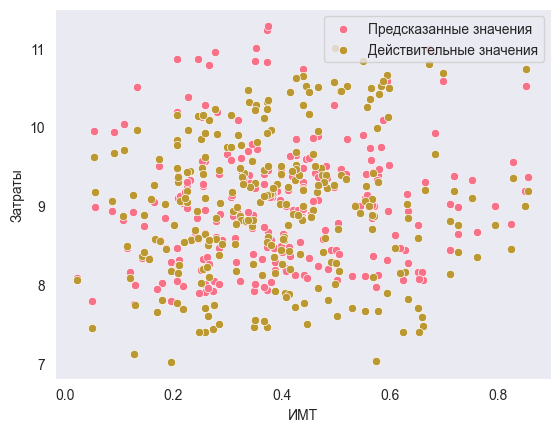

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Создание точечного графика для предсказанных значений
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')

# Добавление точечного графика для действительных значений
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('ИМТ')
plt.ylabel('Затраты')
plt.legend()
plt.show()

## Деревянная модель

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=6, random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [74]:
tr_r2_score = tree_reg.score(X_test, y_test)
tr_r2_score

0.7996348269758904

In [75]:
y_pred = tree_reg.predict(X_test)

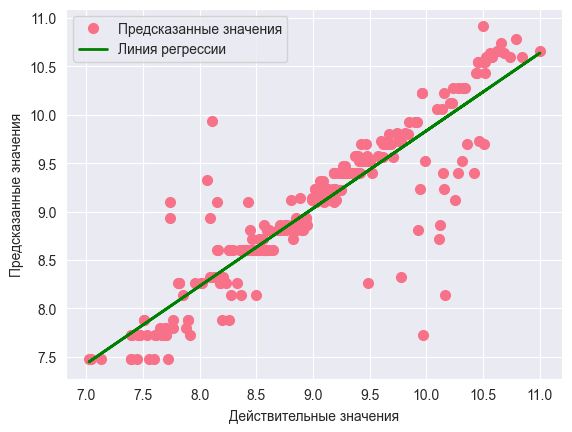

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='green', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

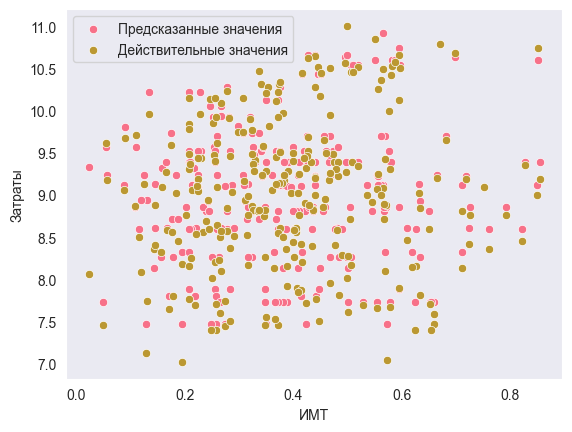

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Создание точечного графика для предсказанных значений
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')

# Добавление точечного графика для действительных значений
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('ИМТ')
plt.ylabel('Затраты')
plt.legend()
plt.show()

## K-ближайших соседей

In [78]:
from sklearn.neighbors import KNeighborsRegressor

kn_reg = KNeighborsRegressor(n_neighbors=8)
kn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [79]:
kn_r2_score = kn_reg.score(X_test, y_test)
kn_r2_score

0.8132609953378886

In [80]:
y_pred = kn_reg.predict(X_test)

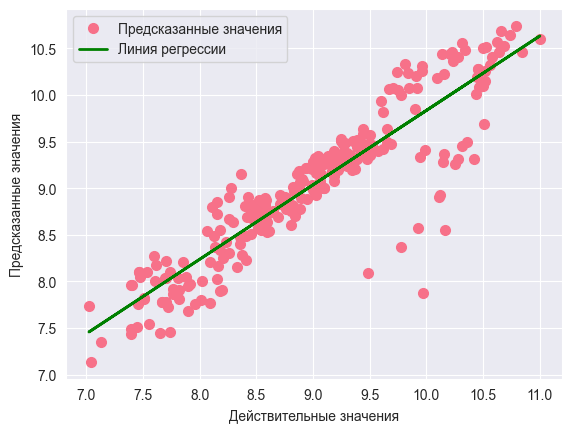

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика для действительных и предсказанных значений
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='green', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

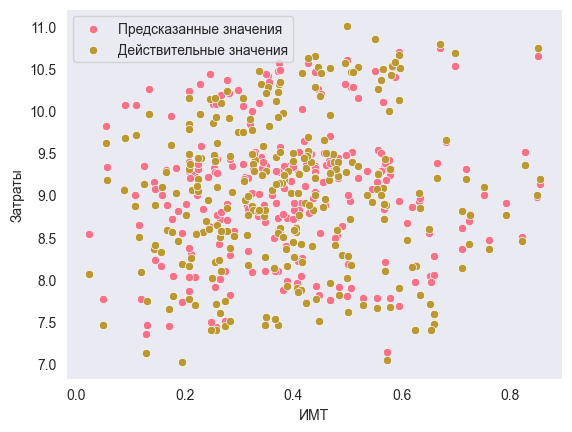

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Создание точечного графика для предсказанных значений
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')

# Добавление точечного графика для действительных значений
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('ИМТ')
plt.ylabel('Затраты')
plt.legend()
plt.show()

## Случайный лес

In [83]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_estimators = 16, random_state = 0)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=16, random_state=0)

In [84]:
rf_r2_score = rand_forest.score(X_test, y_test)
rf_r2_score

0.7989018902760919

In [85]:
y_pred = rand_forest.predict(X_test)

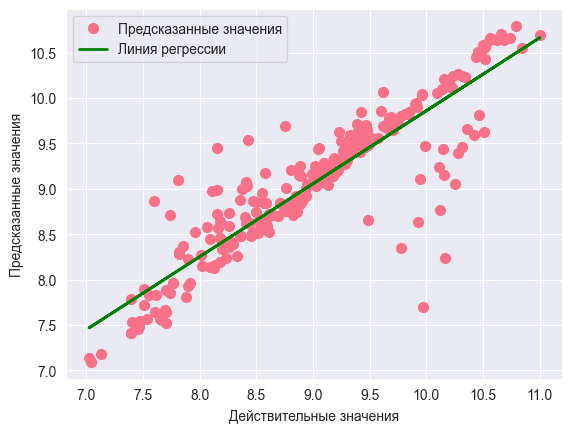

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='green', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

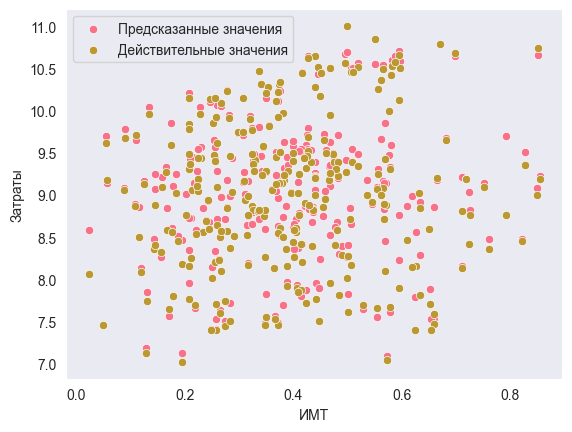

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Указание цветовой палитры
palette = sns.color_palette("husl")

# Настройка цветовой палитры
sns.set_palette(palette)

# Создание точечного графика для предсказанных значений
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')

# Добавление точечного графика для действительных значений
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('ИМТ')
plt.ylabel('Затраты')
plt.legend()
plt.show()

## 5. Подсчет метрик на train и test множествах

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

In [89]:
columns = ['Train','Test']

## Линейная модель

In [90]:
lr_mae = []
lr_mse = []
lr_rmse = []
lr_mape = []

In [91]:
mae = mean_absolute_error(y_train, lin_reg.predict(X_train))
mse = mean_squared_error(y_train, lin_reg.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, lin_reg.predict(X_train))

lr_mae.append(mae)
lr_mse.append(mse)
lr_rmse.append(rmse)
lr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.281524
1,MSE,0.199481
2,RMSE,0.446633
3,MAPE,0.030740


In [92]:
lin_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, lin_pred)
mse = mean_squared_error(y_test, lin_pred)
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
mape = mean_absolute_percentage_error(y_test, lin_pred)

lr_mae.append(mae)
lr_mse.append(mse)
lr_rmse.append(rmse)
lr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.276382
1,MSE,0.186858
2,RMSE,0.432271
3,MAPE,0.030313


## Деревянная модель

In [93]:
tr_mae = []
tr_mse = []
tr_rmse = []
tr_mape = []

In [94]:
mae = mean_absolute_error(y_train, tree_reg.predict(X_train))
mse = mean_squared_error(y_train, tree_reg.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, tree_reg.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, tree_reg.predict(X_train))

tr_mae.append(mae)
tr_mse.append(mse)
tr_rmse.append(rmse)
tr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.174336
1,MSE,0.112829
2,RMSE,0.335900
3,MAPE,0.019289


In [95]:
tree_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, tree_pred)
mse = mean_squared_error(y_test, tree_pred)
rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
mape = mean_absolute_percentage_error(y_test, tree_pred)

tr_mae.append(mae)
tr_mse.append(mse)
tr_rmse.append(rmse)
tr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.217647
1,MSE,0.157503
2,RMSE,0.396866
3,MAPE,0.024403


## K-ближайших соседей

In [96]:
kn_mae = []
kn_mse = []
kn_rmse = []
kn_mape = []

In [97]:
mae = mean_absolute_error(y_train, kn_reg.predict(X_train))
mse = mean_squared_error(y_train, kn_reg.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, kn_reg.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, kn_reg.predict(X_train))

kn_mae.append(mae)
kn_mse.append(mse)
kn_rmse.append(rmse)
kn_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.217357
1,MSE,0.131450
2,RMSE,0.362560
3,MAPE,0.023661


In [98]:
kn_pred = kn_reg.predict(X_test)

mae = mean_absolute_error(y_test, kn_pred)
mse = mean_squared_error(y_test, kn_pred)
rmse = np.sqrt(mean_squared_error(y_test, kn_pred))
mape = mean_absolute_percentage_error(y_test, kn_pred)

kn_mae.append(mae)
kn_mse.append(mse)
kn_rmse.append(rmse)
kn_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.254052
1,MSE,0.146791
2,RMSE,0.383134
3,MAPE,0.028211


## Случайный лес

In [99]:
rf_mae = []
rf_mse = []
rf_rmse = []
rf_mape = []

In [100]:
rf_t_mae = mean_absolute_error(y_train, rand_forest.predict(X_train))
mse = mean_squared_error(y_train, rand_forest.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, rand_forest.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, rand_forest.predict(X_train))

rf_mae.append(mae)
rf_mse.append(mse)
rf_rmse.append(rmse)
rf_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Train': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Train,Value
0,MAE,0.254052
1,MSE,0.029845
2,RMSE,0.172756
3,MAPE,0.009252


In [101]:
forest_pred = rand_forest.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
mape = mean_absolute_percentage_error(y_test, forest_pred)

rf_mae.append(mae)
rf_mse.append(mse)
rf_rmse.append(rmse)
rf_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.220542
1,MSE,0.158079
2,RMSE,0.397591
3,MAPE,0.024635


# 4. Сравнение метрик

In [102]:
compare_r2 = pd.DataFrame({'linear': [lr_r2_score],
                'decisiontree': [tr_r2_score],
                'kneighbors': [kn_r2_score],
                'randomforest': [rf_r2_score]})

compare_r2

,linear,decisiontree,kneighbors,randomforest
0,0.76229,0.799635,0.813261,0.798902


Метод Дерево решений показал лучший результат среди всех (0.825).

In [103]:
df = pd.DataFrame({'Sample': columns,
                'MAE': lr_mae,
                'MSE': lr_mse, 
                'RMSE': lr_rmse, 
                'MAPE': lr_mape})
lr_metrics = df.set_index('Sample')
lr_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.281524,0.199481,0.446633,0.030740
Test,0.276382,0.186858,0.432271,0.030313


Получилась не нулевая метрика MAE равная 0.27, значит, что предсказанные значения близки к истинным значениям. На тестовой выборке значения также недалеки от нуля, что указывает на то, что модель хорошо обучается на новых данных, а не переобучается на тренировочных.

In [104]:
df = pd.DataFrame({'Sample': columns,
                'MAE': tr_mae,
                'MSE': tr_mse, 
                'RMSE': tr_rmse, 
                'MAPE': tr_mape})
tr_metrics = df.set_index('Sample')
tr_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.174336,0.112829,0.335900,0.019289
Test,0.217647,0.157503,0.396866,0.024403


Средняя абсолютная ошибка (MAE) в процессе обучения равна 0.18, в то время как на тестовом наборе она равна 0.21. Это необязательно означает, что модель переобучилась, так как разница незначительна. 

In [105]:
df = pd.DataFrame({'Sample': columns,
                'MAE': kn_mae,
                'MSE': kn_mse, 
                'RMSE': kn_rmse, 
                'MAPE': kn_mape})
kn_metrics = df.set_index('Sample')
kn_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.217357,0.131450,0.362560,0.023661
Test,0.254052,0.146791,0.383134,0.028211


По метрике MAE видно, что результаты предсказаний недалеки от истинных значений целевой переменной, при этом разница между метриками не велика, чтобы говорить о переобучении.

In [106]:
df = pd.DataFrame({'Sample': columns,
                'MAE': rf_mae,
                'MSE': rf_mse, 
                'RMSE': rf_rmse, 
                'MAPE': rf_mape})
rf_metrics = df.set_index('Sample')
rf_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.254052,0.029845,0.172756,0.009252
Test,0.220542,0.158079,0.397591,0.024635


Аналогично предыдущей модели разница между метриками MAE для тестовой и тренировочной выборке не слишком значительна, что говорит о том, что модель может все еще хорошо обобщать свои знания на новые данные.

В результате получаем, что все модели продемонстрировали нормальное обучение.